# Load data + Standardization + Outlier Removal

In [1]:
import warnings
warnings.filterwarnings('ignore')
from __future__ import print_function
import pandas as pd # data analysis
import numpy as np # linear algebra

#import libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score
from scipy.stats import zscore

In [2]:
crop = pd.read_csv('Crop_recommendation.csv')
crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [3]:
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = crop.drop('label', axis=1)
y = crop['label']

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate z-scores for each feature
z_scores = zscore(X_scaled)

# Define a threshold for z-scores (e.g., 3 standard deviations)
threshold = 3

# Identify and remove outliers
outlier_mask = (z_scores < threshold).all(axis=1)
crop_data_no_outliers = crop[outlier_mask]

# Display the DataFrame without outliers
print("Crop Data without Outliers:")
print(crop_data_no_outliers)

Crop Data without Outliers:
        N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2045 rows x 8 columns]


In [4]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [7]:
print(crop.shape, crop_data_no_outliers.shape)

(2200, 8) (2045, 8)


In [8]:
features = crop_data_no_outliers[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = crop_data_no_outliers['label']

In [9]:
acc = []
model = []

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size = 0.2,random_state =42)

# Testing with AdaBoosts

In [19]:
'''
# Import necessary libraries
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

############################################

#Creating different AdaBoost Models with various base_estimator models:

ada_base = AdaBoostClassifier()
ada_deci = AdaBoostClassifier(DecisionTreeClassifier())
ada_extr = AdaBoostClassifier(ExtraTreeClassifier())
ada_logr = AdaBoostClassifier(LogisticRegression())
ada_svc = AdaBoostClassifier(SVC(probability=True , kernel='linear'))
ada_gnb = AdaBoostClassifier(GaussianNB())

##########################################################
# ADABOOST BASE MODEL:

# Train the model on the standardized data
ada_base.fit(X_train, y_train)

# Make predictions on the standardized test set
y_pred = ada_base.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (default model): {accuracy}")

# Display other metrics if needed
print("Classification Report:\n", classification_report(y_test, y_pred))

############################################################
# ADABOOST with DecisionTreeClassifier:

ada_deci.fit(X_train, y_train)

y_pred = ada_deci.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (DecisionTreeClassifier base estimator): {accuracy}")

print("Classification Report:\n", classification_report(y_test, y_pred))

####################################################################
# ADABOOST with ExtraTreeClassifier:

ada_extr.fit(X_train, y_train)

y_pred = ada_extr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (ExtraTreeClassifier base estimator): {accuracy}")

print("Classification Report:\n", classification_report(y_test, y_pred))

######################################################################
# ADABOOST with Logistic Regression:

ada_logr.fit(X_train, y_train)

y_pred = ada_logr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (LogisticRegression base estimator): {accuracy}")

print("Classification Report:\n", classification_report(y_test, y_pred))

########################################################################
# ADABOOST with SVC Model:

ada_svc.fit(X_train, y_train)

y_pred = ada_svc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (SVC base estimator): {accuracy}")

print("Classification Report:\n", classification_report(y_test, y_pred))

#########################################################
# ADABOOST with GaussianNB:

ada_gnb.fit(X_train, y_train)

y_pred = ada_gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (GaussianNB base estimator): {accuracy}")

print("Classification Report:\n", classification_report(y_test, y_pred))

#########################################################
# Gaussian Naive Bayes: -> PLAIN (no adaBoost)
naive_bayes_model = GaussianNB()

naive_bayes_model.fit(X_train, y_train)

y_pred = naive_bayes_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (GaussianNB Plain model): {accuracy}")

print("Classification Report:\n", classification_report(y_test, y_pred))

##########################################################
'''

Accuracy (default model): 0.15892420537897312
Classification Report:
               precision    recall  f1-score   support

       apple       0.61      1.00      0.76        14
      banana       0.00      0.00      0.00        24
   blackgram       0.00      0.00      0.00        17
    chickpea       0.42      1.00      0.59        20
     coconut       0.00      0.00      0.00        19
      coffee       0.00      0.00      0.00        29
      cotton       0.00      0.00      0.00        15
      grapes       0.00      0.00      0.00         9
        jute       0.00      0.00      0.00        17
 kidneybeans       0.00      0.00      0.00        28
      lentil       0.04      1.00      0.08        14
       maize       0.00      0.00      0.00        16
       mango       0.00      0.00      0.00        16
   mothbeans       0.00      0.00      0.00        17
    mungbean       0.00      0.00      0.00        18
   muskmelon       1.00      1.00      1.00        17
      orang

# Data Augmentation

In [11]:
#Trying data augmentation prior to prediction:
import pandas as pd
import numpy as np

def augment_data(df, n=1, seed=None):
    
    augmented_data = []

    np.random.seed(seed)

    for _, row in df.iterrows():
        for _ in range(n):
            augmented_row = row.copy()

            # Apply small variations to numerical features (e.g., temperature, rainfall, humidity)
            for feature in df.columns[:-1]:  # Exclude the target variable column
                augmented_row[feature] += np.random.uniform(low=-1, high=1)

            augmented_data.append(augmented_row)

    augmented_df = pd.DataFrame(augmented_data, columns=df.columns)
    augmented_df.reset_index(drop=True, inplace=True)

    return pd.concat([df, augmented_df], ignore_index=True)

augmented_crop_data = augment_data(crop_data_no_outliers, n=2, seed=42)
print("Original DataFrame shape:", crop_data_no_outliers.shape)
print("Augmented DataFrame shape:", augmented_crop_data.shape)

Original DataFrame shape: (2045, 8)
Augmented DataFrame shape: (6135, 8)


In [12]:
features = augmented_crop_data[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = augmented_crop_data['label']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size = 0.2,random_state =42)

# Trying with AdaBoost

In [27]:
'''
# Import necessary libraries
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

############################################

#Creating different AdaBoost Models with various base_estimator models:

ada_base = AdaBoostClassifier()
ada_deci = AdaBoostClassifier(DecisionTreeClassifier())
ada_extr = AdaBoostClassifier(ExtraTreeClassifier())
ada_logr = AdaBoostClassifier(LogisticRegression())
ada_svc = AdaBoostClassifier(SVC(probability=True , kernel='linear'))
ada_gnb = AdaBoostClassifier(GaussianNB())

##########################################################
# ADABOOST BASE MODEL:

# Train the model on the standardized data
ada_base.fit(X_train, y_train)

# Make predictions on the standardized test set
y_pred = ada_base.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (default model): {accuracy}")

# Display other metrics if needed
print("Classification Report:\n", classification_report(y_test, y_pred))

############################################################
# ADABOOST with DecisionTreeClassifier:

ada_deci.fit(X_train, y_train)

y_pred = ada_deci.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (DecisionTreeClassifier base estimator): {accuracy}")

print("Classification Report:\n", classification_report(y_test, y_pred))

####################################################################
# ADABOOST with ExtraTreeClassifier:

ada_extr.fit(X_train, y_train)

y_pred = ada_extr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (ExtraTreeClassifier base estimator): {accuracy}")

print("Classification Report:\n", classification_report(y_test, y_pred))

######################################################################
# ADABOOST with Logistic Regression:

ada_logr.fit(X_train, y_train)

y_pred = ada_logr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (LogisticRegression base estimator): {accuracy}")

print("Classification Report:\n", classification_report(y_test, y_pred))

########################################################################
# ADABOOST with SVC Model:

ada_svc.fit(X_train, y_train)

y_pred = ada_svc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (SVC base estimator): {accuracy}")

print("Classification Report:\n", classification_report(y_test, y_pred))

#########################################################
# ADABOOST with GaussianNB:

ada_gnb.fit(X_train, y_train)

y_pred = ada_gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (GaussianNB base estimator): {accuracy}")

print("Classification Report:\n", classification_report(y_test, y_pred))

#########################################################
# Gaussian Naive Bayes: -> PLAIN (no adaBoost)
naive_bayes_model = GaussianNB()

naive_bayes_model.fit(X_train, y_train)

y_pred = naive_bayes_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (GaussianNB Plain model): {accuracy}")

print("Classification Report:\n", classification_report(y_test, y_pred))

##########################################################
'''

Accuracy (default model): 0.11083944580277098
Classification Report:
               precision    recall  f1-score   support

       apple       0.43      1.00      0.60        30
      banana       0.00      0.00      0.00        56
   blackgram       0.00      0.00      0.00        53
    chickpea       0.00      0.00      0.00        68
     coconut       0.00      0.00      0.00        60
      coffee       0.00      0.00      0.00        54
      cotton       0.00      0.00      0.00        60
      grapes       0.00      0.00      0.00        40
        jute       0.00      0.00      0.00        72
 kidneybeans       0.00      0.00      0.00        59
      lentil       0.05      1.00      0.09        50
       maize       0.00      0.00      0.00        58
       mango       0.00      0.00      0.00        53
   mothbeans       0.00      0.00      0.00        46
    mungbean       0.00      0.00      0.00        64
   muskmelon       1.00      1.00      1.00        56
      orang

# Trying with multiple other models

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report
from mlxtend.plotting import plot_decision_regions

# Assuming you have a DataFrame named 'crop_data' with relevant features and 'CropType' as the target variable
# Replace this with your actual DataFrame and column names

# Initialize models
models = {
    'Gaussian Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost(Base)': AdaBoostClassifier(random_state=42),
    'AdaBoost(Decision Tree)': AdaBoostClassifier(DecisionTreeClassifier()),
    'AdaBoost(Extra Tree)': AdaBoostClassifier(ExtraTreeClassifier()),
    'AdaBoost(Logistic Regression)': AdaBoostClassifier(LogisticRegression()),
    'AdaBoost(GaussianNB())': AdaBoostClassifier(GaussianNB()),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Stochastic Gradient Descent': SGDClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Linear SVM': LinearSVC(random_state=42),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Extra Tree': ExtraTreeClassifier(random_state=42),
    'Neural Network': MLPClassifier(random_state=42),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'Bagging': BaggingClassifier(n_estimators=10, random_state=42)
}

In [17]:

# Train and evaluate models
accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f'Accuracy for {name}: {acc:.4f}')

Accuracy for Gaussian Naive Bayes: 0.9935
Accuracy for Random Forest: 0.9992
Accuracy for Gradient Boosting: 0.9919
Accuracy for AdaBoost(Base): 0.1108
Accuracy for AdaBoost(Decision Tree): 0.9894
Accuracy for AdaBoost(Extra Tree): 0.9739
Accuracy for AdaBoost(Logistic Regression): 0.4197
Accuracy for AdaBoost(GaussianNB()): 0.9910
Accuracy for Logistic Regression: 0.9641
Accuracy for Stochastic Gradient Descent: 0.6064
Accuracy for Support Vector Machine: 0.9829
Accuracy for Linear SVM: 0.7922
Accuracy for k-Nearest Neighbors: 0.9853
Accuracy for Decision Tree: 0.9902
Accuracy for Extra Tree: 0.9633
Accuracy for Neural Network: 0.9756
Accuracy for Linear Discriminant Analysis: 0.9682
Accuracy for Quadratic Discriminant Analysis: 0.9919
Accuracy for Bagging: 0.9902


# Visualizations

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Getting rid of models less than 95 % accuracy
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost(Decision Tree)': AdaBoostClassifier(DecisionTreeClassifier()),
    'AdaBoost(Extra Tree)': AdaBoostClassifier(ExtraTreeClassifier()),
    'AdaBoost(GaussianNB())': AdaBoostClassifier(GaussianNB()),
    'Guassian Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Extra Tree': ExtraTreeClassifier(random_state=42),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'Bagging': BaggingClassifier(n_estimators=10, random_state=42)
}

# Dictionary to store evaluation metrics for each model
evaluation_metrics = {}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store metrics in the dictionary
    evaluation_metrics[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    }

    print(f'Model: {name}')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print('\n')

# Display the dictionary containing evaluation metrics for each model
print("Evaluation Metrics:")
print(evaluation_metrics)

Model: Random Forest
Accuracy: 0.9991850040749797
Precision: 0.9991988175652342
Recall: 0.9991850040749797
F1 Score: 0.9991846060305718


Model: Gradient Boosting
Accuracy: 0.9918500407497962
Precision: 0.9920384042102937
Recall: 0.9918500407497962
F1 Score: 0.9918631459370694


Model: AdaBoost(Decision Tree)
Accuracy: 0.9902200488997555
Precision: 0.9903358840716048
Recall: 0.9902200488997555
F1 Score: 0.990245152472126


Model: AdaBoost(Extra Tree)
Accuracy: 0.9511002444987775
Precision: 0.9517975406631691
Recall: 0.9511002444987775
F1 Score: 0.9511674076434028


Model: AdaBoost(GaussianNB())
Accuracy: 0.9910350448247759
Precision: 0.9911180170096933
Recall: 0.9910350448247759
F1 Score: 0.991011308249521


Model: Guassian Naive Bayes
Accuracy: 0.993480032599837
Precision: 0.9938872573946164
Recall: 0.993480032599837
F1 Score: 0.9934147523798071


Model: Logistic Regression
Accuracy: 0.9641401792991035
Precision: 0.9645137417283247
Recall: 0.9641401792991035
F1 Score: 0.96378165316260

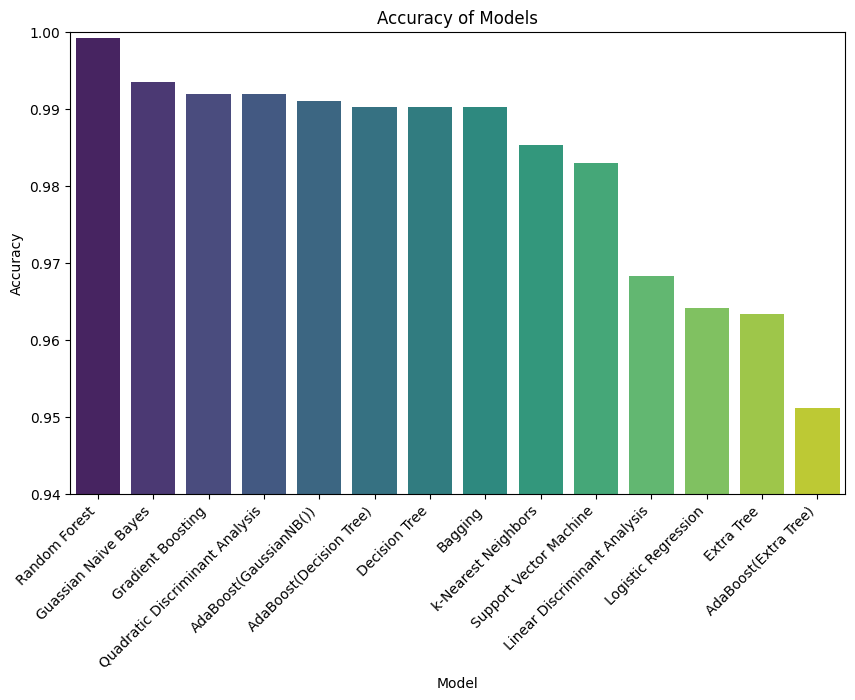

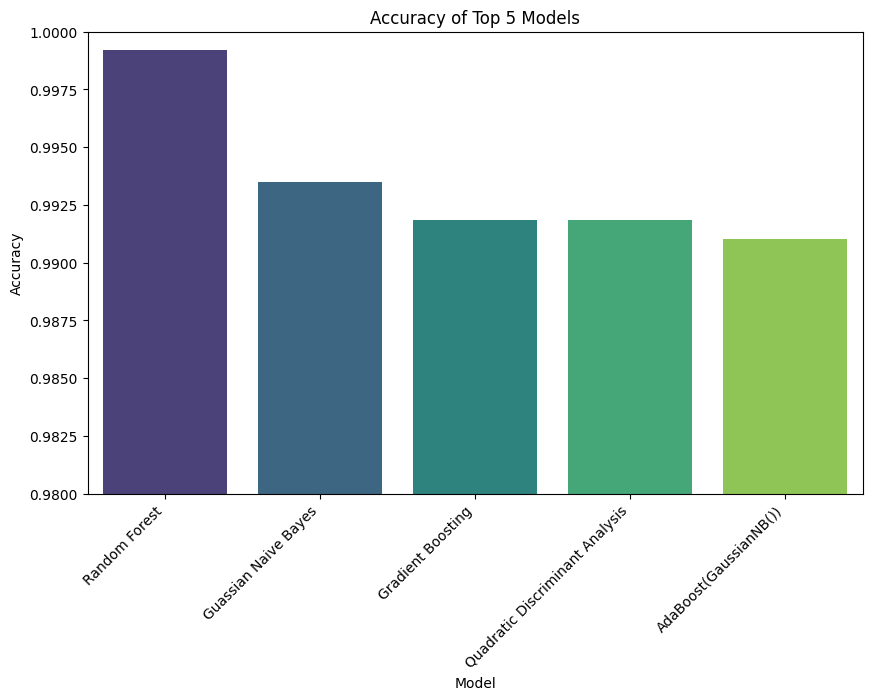

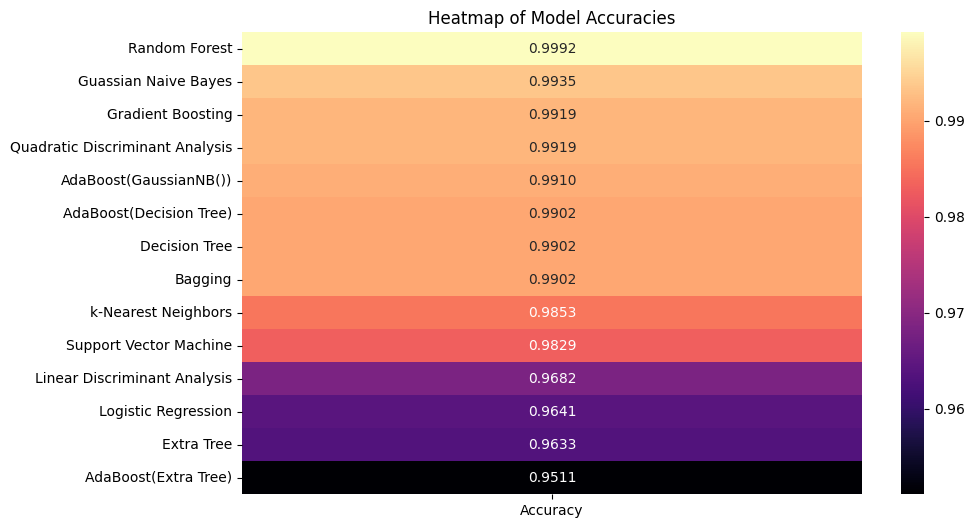

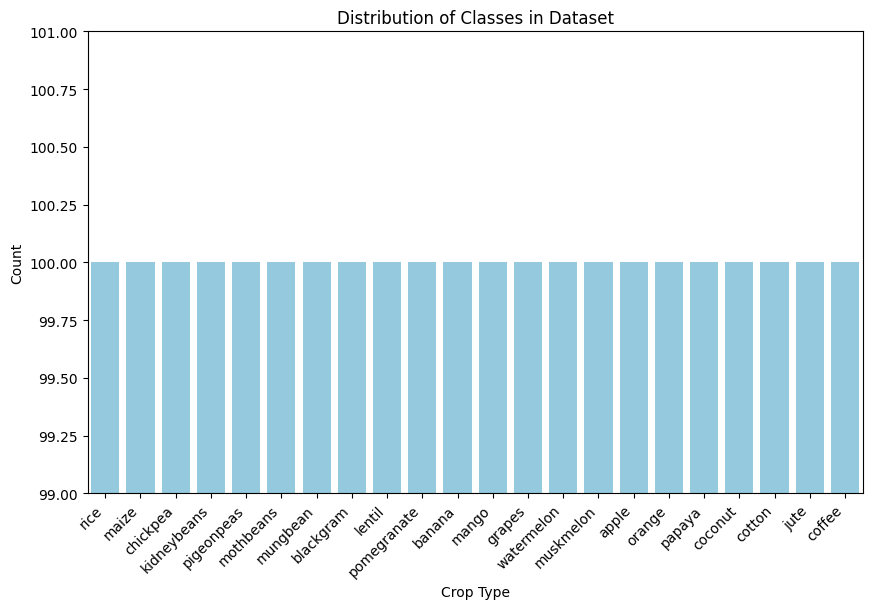

In [24]:
# Sort the models based on accuracy
sorted_accuracies = dict(sorted(evaluation_metrics.items(), key=lambda item: item[1]['Accuracy'], reverse=True))
top_models = dict(sorted(evaluation_metrics.items(), key=lambda item: item[1]['Accuracy'], reverse=True)[:5])

# Plot accuracy of all models in a bar chart (sorted)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(sorted_accuracies.keys()), y=[item['Accuracy'] for item in sorted_accuracies.values()], palette='viridis')
plt.title('Accuracy of Models')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.ylim(0.94, 1.0)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

# Plot accuracy of top 5 models in a bar chart (sorted)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_models.keys()), y=[item['Accuracy'] for item in top_models.values()], palette='viridis')
plt.title('Accuracy of Top 5 Models')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.ylim(0.98, 1.0)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

# Plot heatmap of accuracies of all models (sorted)
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame([item['Accuracy'] for item in sorted_accuracies.values()],
                         index=list(sorted_accuracies.keys()), columns=['Accuracy']),
            annot=True, fmt=".4f", cmap="magma")
plt.title('Heatmap of Model Accuracies')
plt.show()

# Plot distribution of classes in the dataset with different colors
plt.figure(figsize=(10, 6))
sns.countplot(x=y, color='skyblue')
plt.title('Distribution of Classes in Dataset')
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.ylim(99, 101)
plt.show()


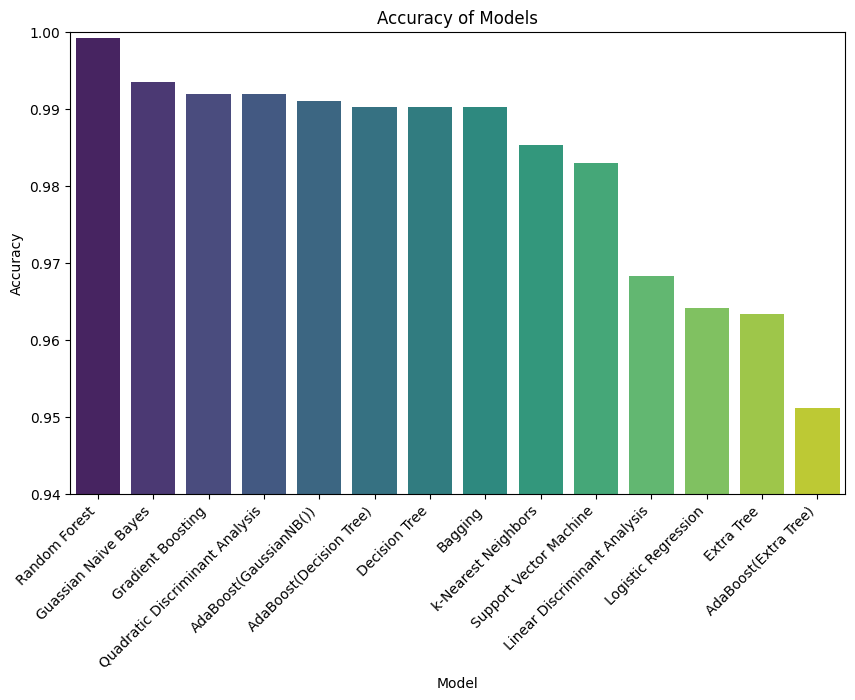

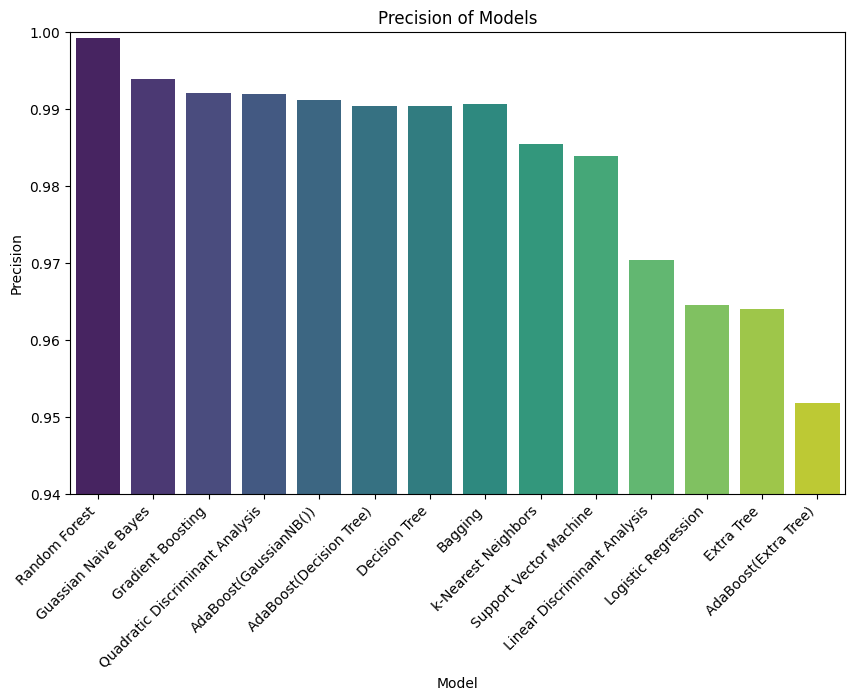

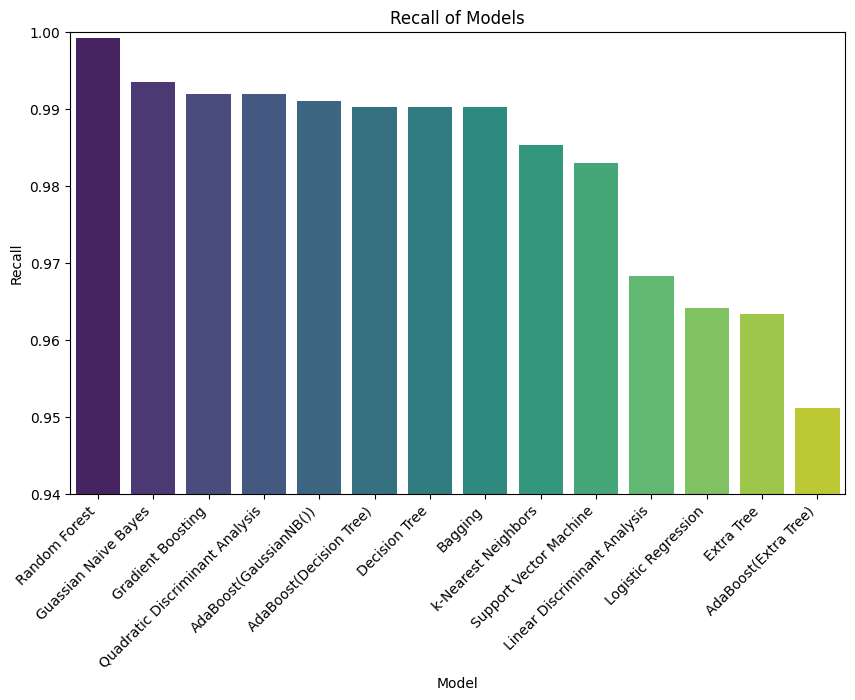

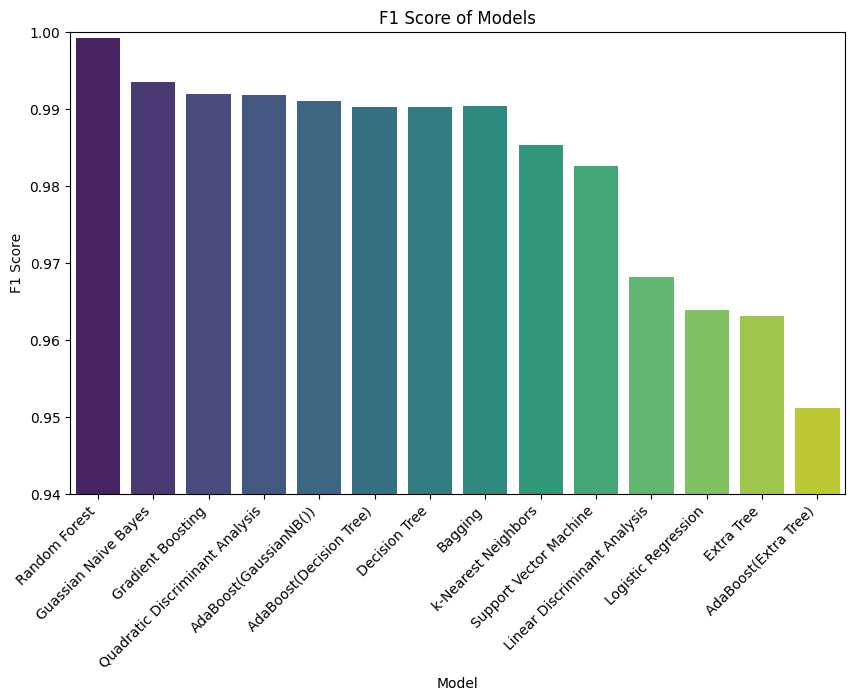

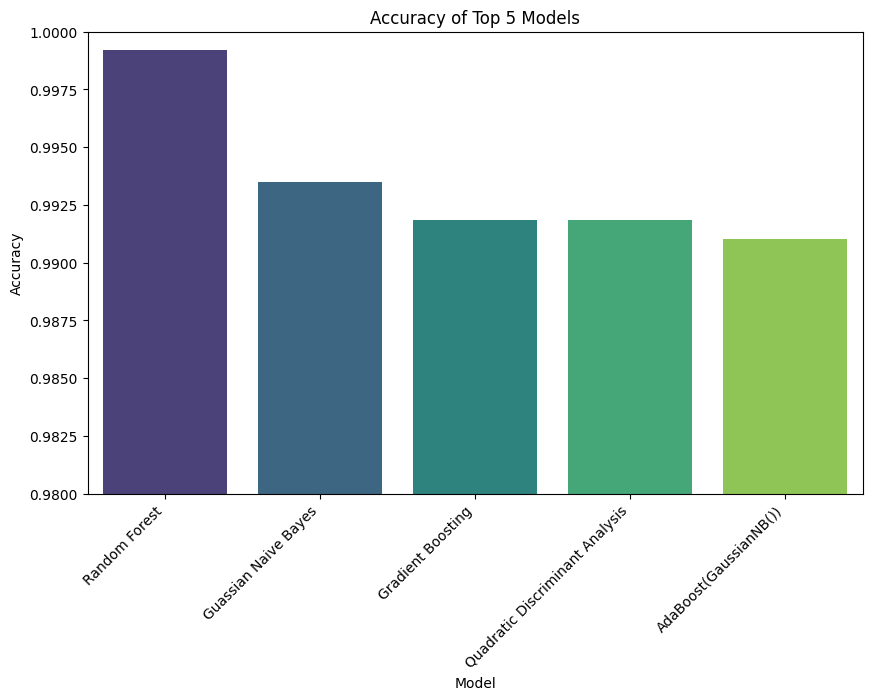

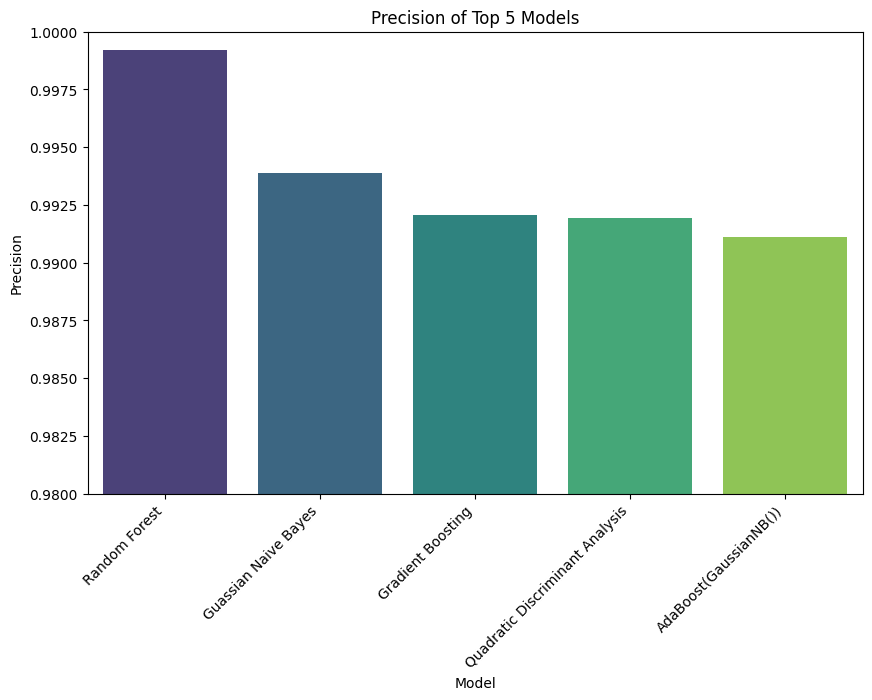

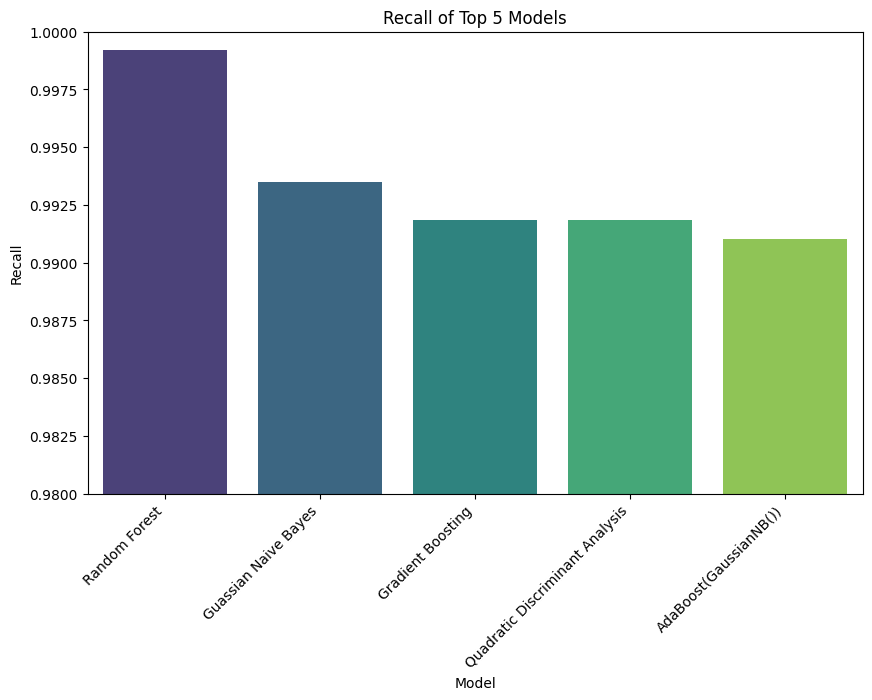

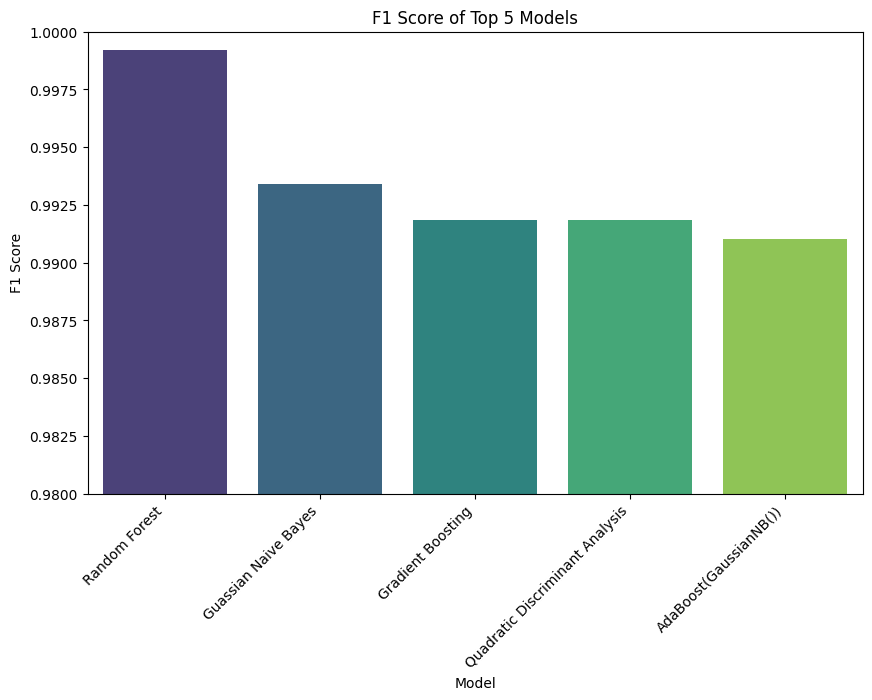

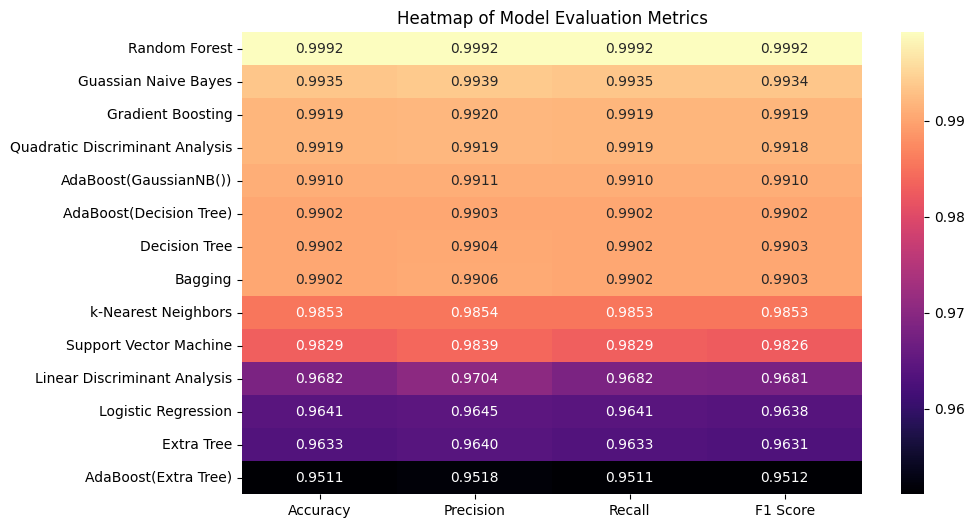

In [32]:
# Sorting the models based on accuracy
sorted_metrics = dict(sorted(evaluation_metrics.items(), key=lambda item: item[1]['Accuracy'], reverse=True))
top_models = dict(sorted(evaluation_metrics.items(), key=lambda item: item[1]['Accuracy'], reverse=True)[:5])

# Plot precision, recall, and F1 score of all models in bar charts (sorted)
metrics_to_plot = ['Accuracy','Precision', 'Recall', 'F1 Score']

for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(sorted_metrics.keys()), y=[item[1][metric] for item in sorted_metrics.items()], palette='viridis')
    plt.title(f'{metric} of Models')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.ylim(0.94, 1.0)
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.show()

# Plot precision, recall, and F1 score of top 5 models in bar charts (sorted)
for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(top_models.keys()), y=[item[1][metric] for item in top_models.items()], palette='viridis')
    plt.title(f'{metric} of Top 5 Models')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.ylim(0.98, 1.0)
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.show()

# Plot heatmap of precision, recall, and F1 score of all models (sorted)
metrics_df = pd.DataFrame({metric: [item[1][metric] for item in sorted_metrics.items()] for metric in metrics_to_plot},
                           index=list(sorted_metrics.keys()))

plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df, annot=True, fmt=".4f", cmap="magma")
plt.title('Heatmap of Model Evaluation Metrics')
plt.show()

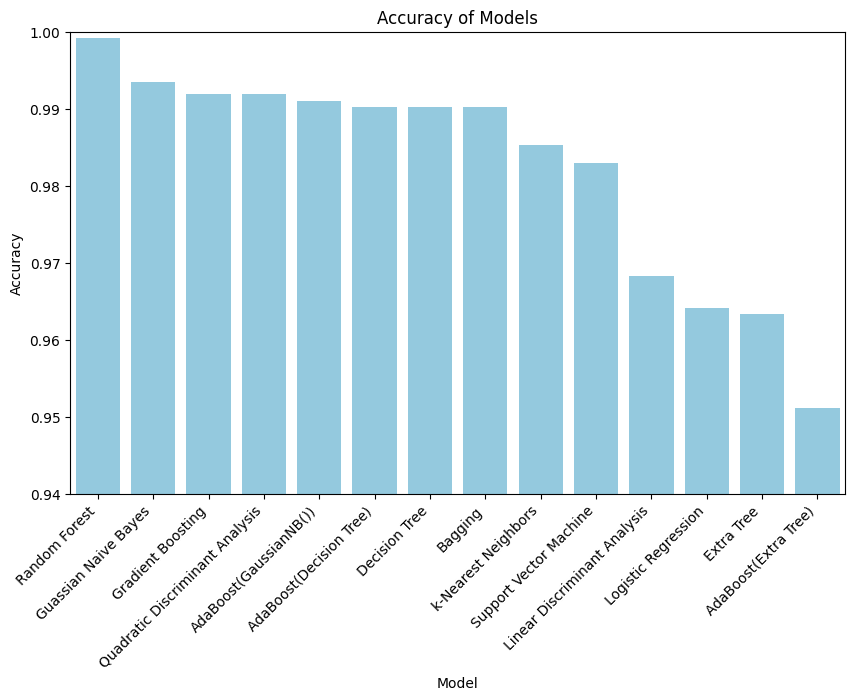

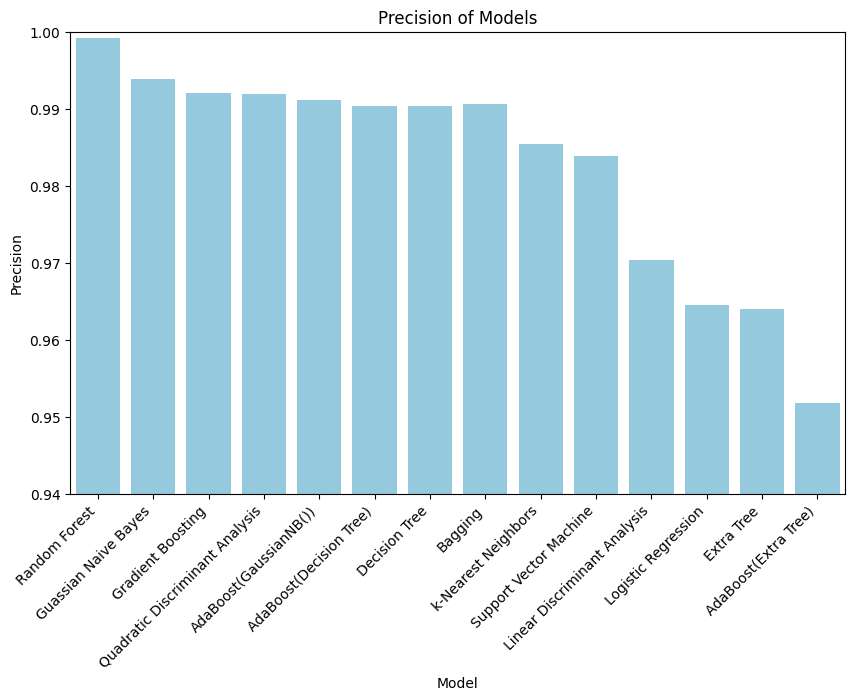

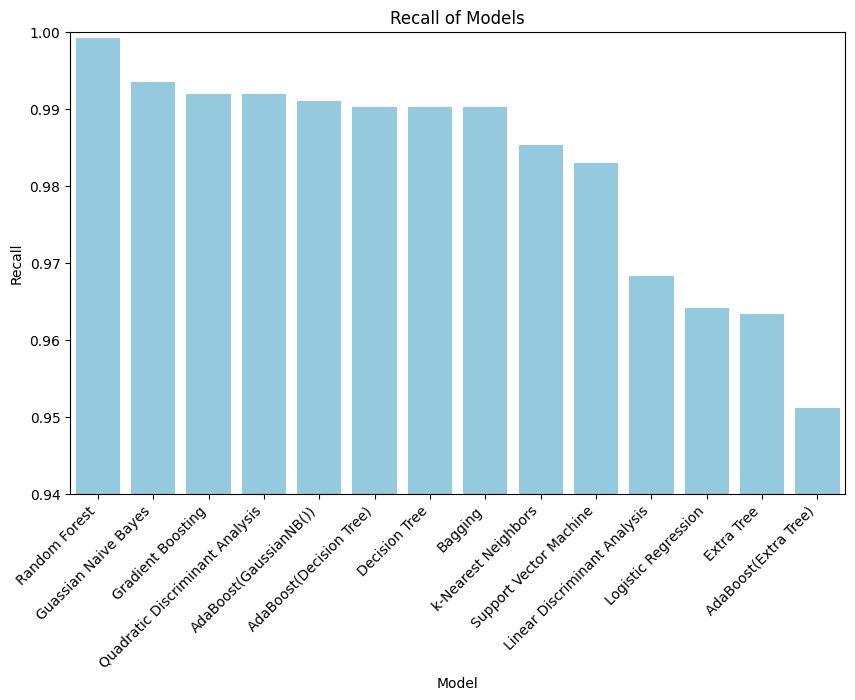

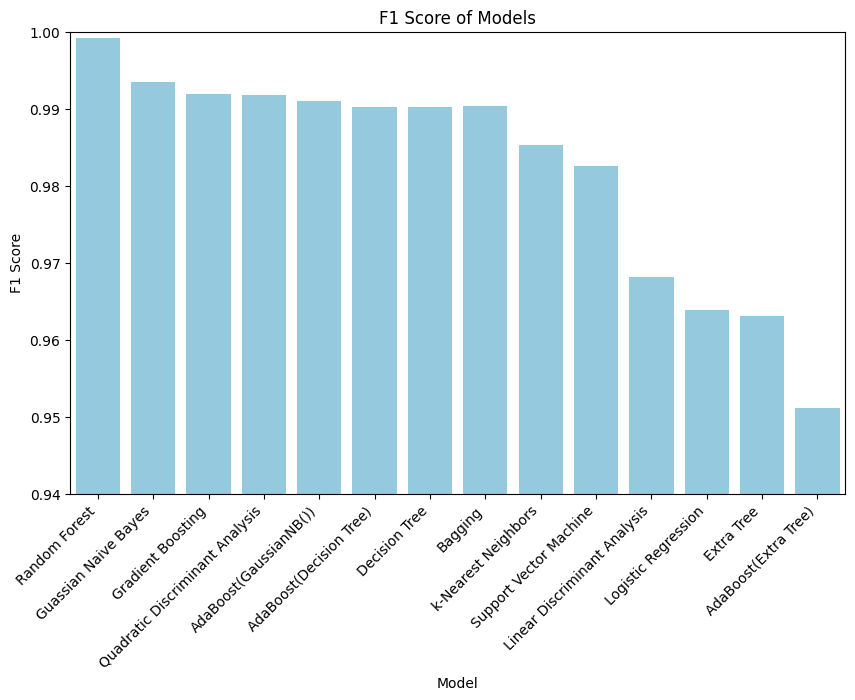

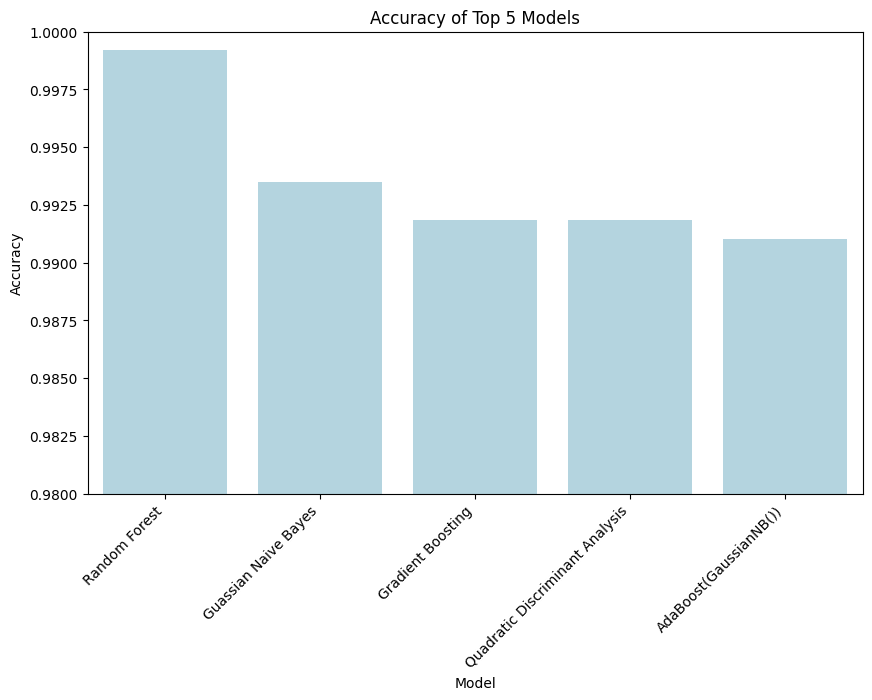

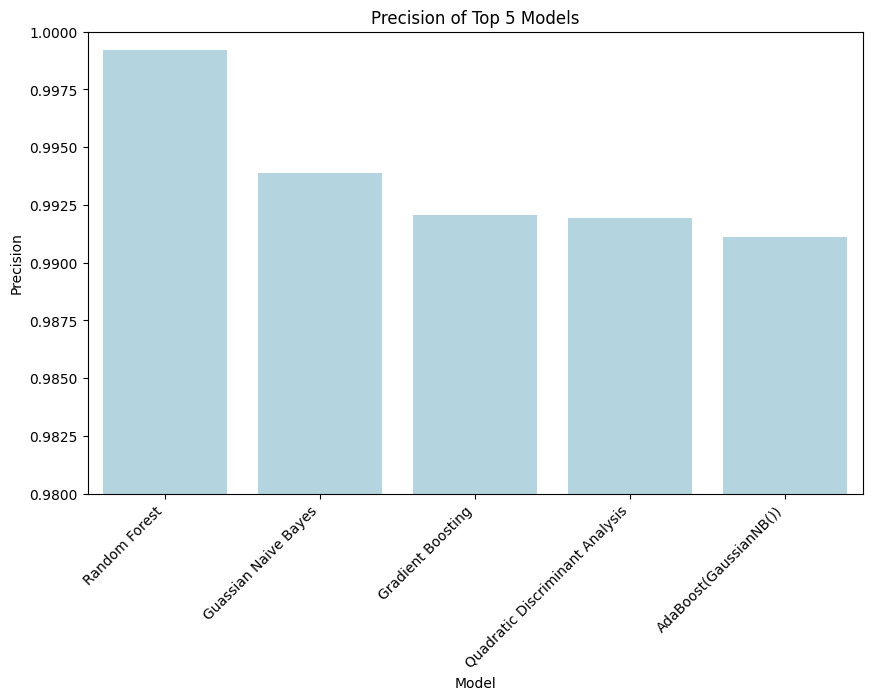

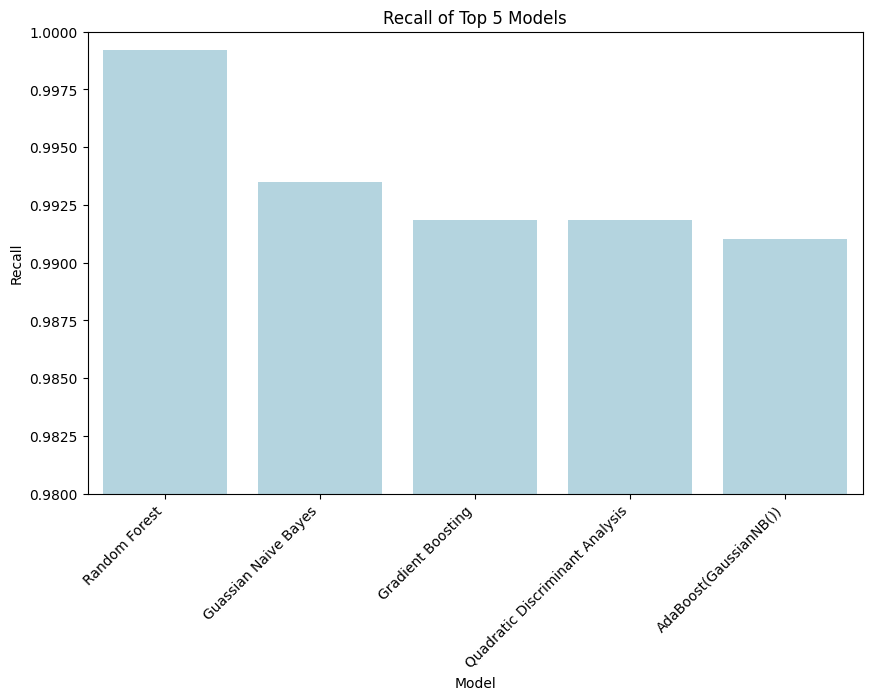

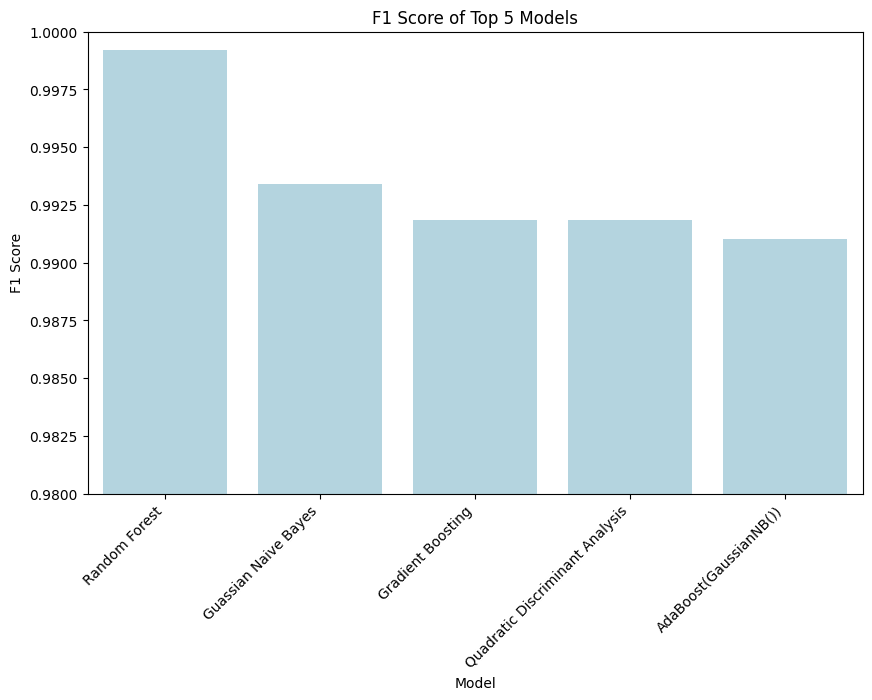

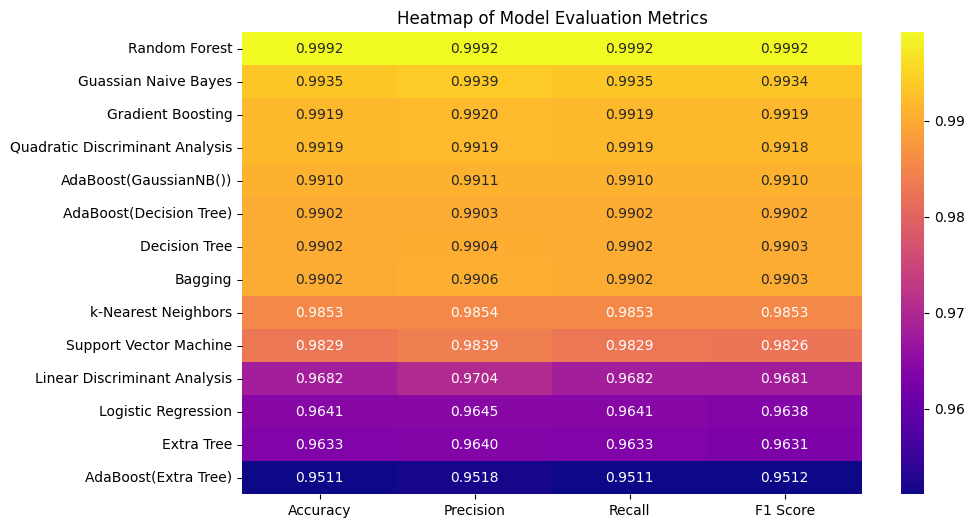

In [33]:
########### ALTERNATE COLOUR SCHEMES #####################

# Sorting the models based on accuracy
sorted_metrics = dict(sorted(evaluation_metrics.items(), key=lambda item: item[1]['Accuracy'], reverse=True))
top_models = dict(sorted(evaluation_metrics.items(), key=lambda item: item[1]['Accuracy'], reverse=True)[:5])

# Plot precision, recall, and F1 score of all models in bar charts (sorted)
metrics_to_plot = ['Accuracy','Precision', 'Recall', 'F1 Score']

for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(sorted_metrics.keys()), y=[item[1][metric] for item in sorted_metrics.items()], color='skyblue')
    plt.title(f'{metric} of Models')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.ylim(0.94, 1.0)
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.show()

# Plot precision, recall, and F1 score of top 5 models in bar charts (sorted)
for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(top_models.keys()), y=[item[1][metric] for item in top_models.items()], color='lightblue')
    plt.title(f'{metric} of Top 5 Models')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.ylim(0.98, 1.0)
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.show()

# Plot heatmap of precision, recall, and F1 score of all models (sorted)
metrics_df = pd.DataFrame({metric: [item[1][metric] for item in sorted_metrics.items()] for metric in metrics_to_plot},
                           index=list(sorted_metrics.keys()))

plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df, annot=True, fmt=".4f", cmap="plasma")
plt.title('Heatmap of Model Evaluation Metrics')
plt.show()

In [37]:
# Get the top 5 models based on accuracy
top_models_dict = {
                   'Random Forest':RandomForestClassifier(random_state=42),
                   'Gaussian Naive Bayes': GaussianNB(),
                   'Gradient Boosting': GradientBoostingClassifier(),
                   'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
                   'AdaBoost(GaussianNB())':AdaBoostClassifier(GaussianNB())
                    }

sorted_accuracies = {key: value['Accuracy'] for key, value in sorted(evaluation_metrics.items(), key=lambda item: item[1]['Accuracy'], reverse=True)}

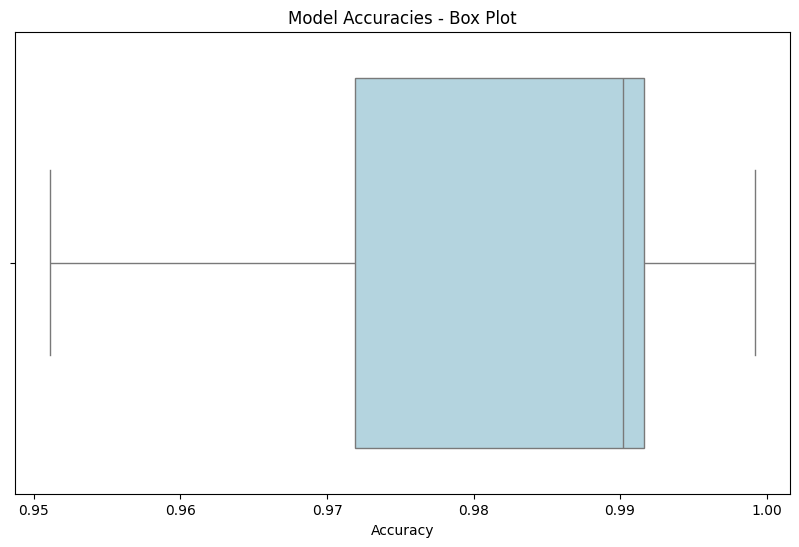

In [38]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=list(sorted_accuracies.values()), color='lightblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracies - Box Plot')
plt.show()

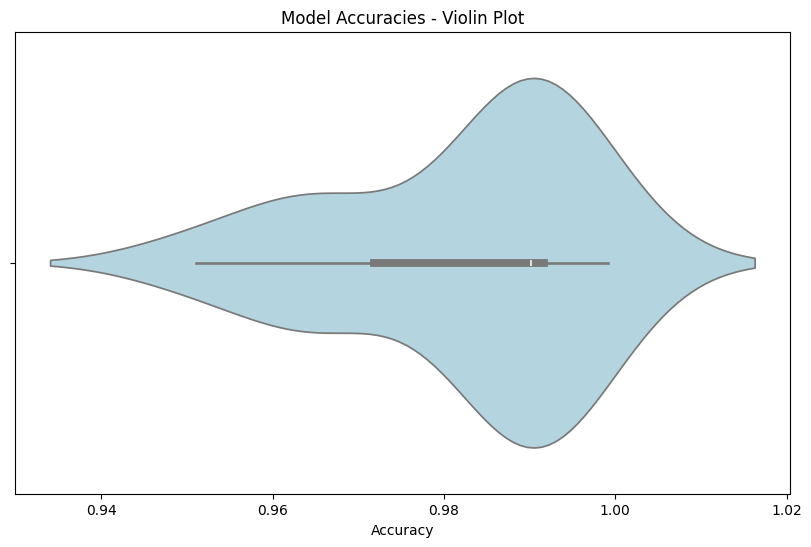

In [39]:
# Violin plot:
plt.figure(figsize=(10, 6))
sns.violinplot(x=list(sorted_accuracies.values()), color='lightblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracies - Violin Plot')
plt.show()

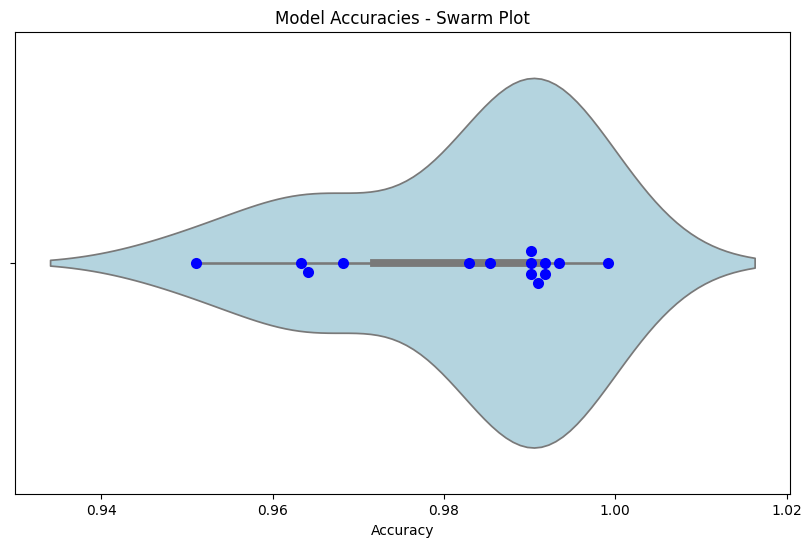

In [40]:
# Swarm Plot:
plt.figure(figsize=(10, 6))
sns.swarmplot(x=list(sorted_accuracies.values()), color='blue', size=8)
sns.violinplot(x=list(sorted_accuracies.values()), color='lightblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracies - Swarm Plot')
plt.show()

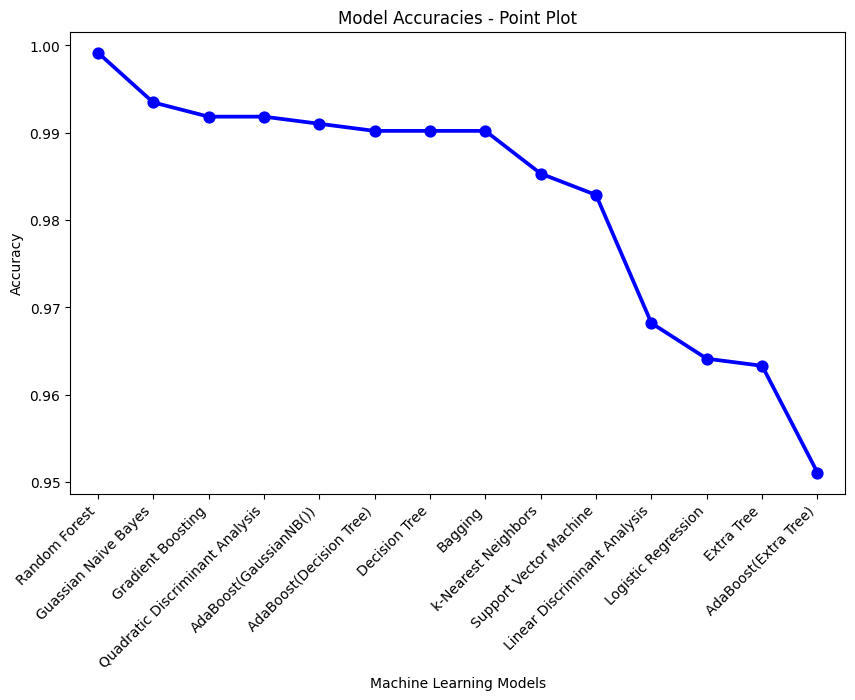

In [41]:
# Piont plot:
plt.figure(figsize=(10, 6))
sns.pointplot(x=list(sorted_accuracies.keys()), y=list(sorted_accuracies.values()), color='blue')
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies - Point Plot')
plt.xticks(rotation=45, ha='right')
plt.show()

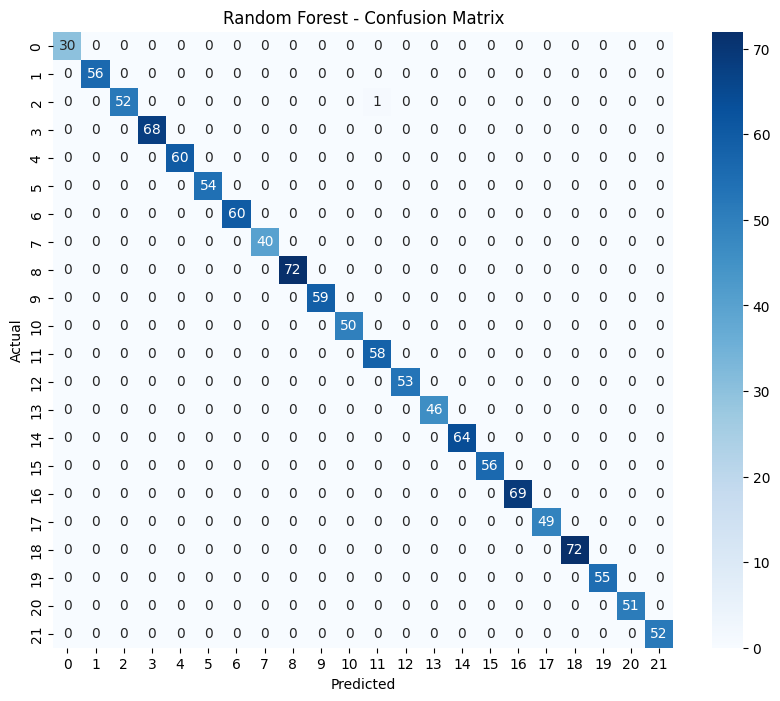

In [43]:
# Confusion Matrix:
from sklearn.preprocessing import LabelEncoder

# Separate features and target variable
X = augmented_crop_data.drop('label', axis=1)
y = augmented_crop_data['label']

# Convert crop labels to numeric using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Create a confusion matrix using pd.crosstab
confusion_matrix_df = pd.crosstab(index=y_test, columns=y_pred, rownames=['Actual'], colnames=['Predicted'])

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest - Confusion Matrix')
plt.show()


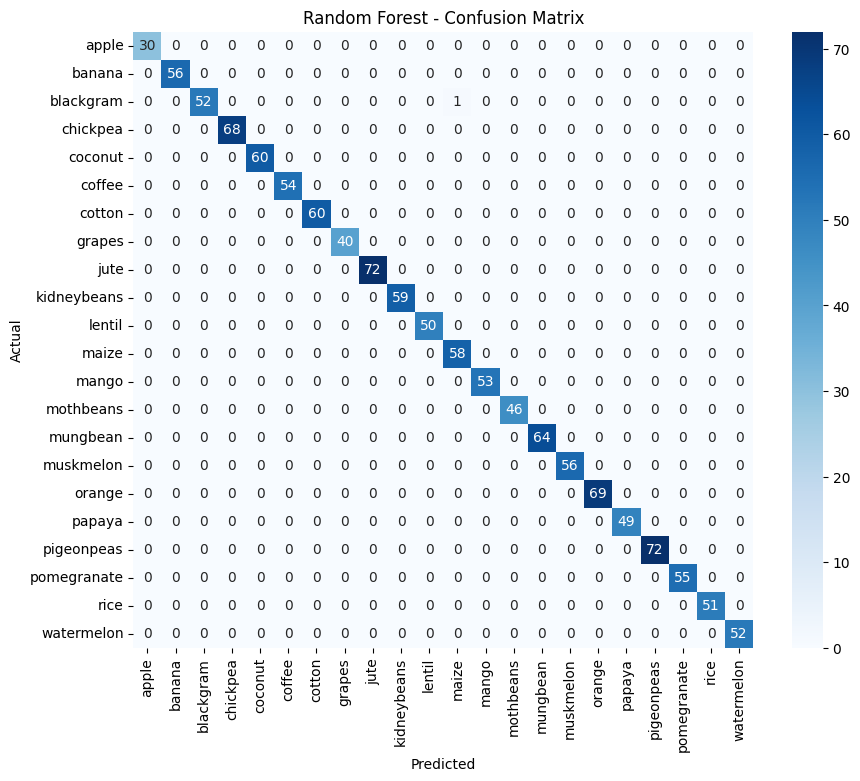

In [44]:
# Using label names:

# Separate features and target variable
X = augmented_crop_data.drop('label', axis=1)
y = augmented_crop_data['label']

# Convert crop labels to numeric using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Get actual class names
class_names = label_encoder.classes_

# Create a confusion matrix using pd.crosstab
confusion_matrix_df = pd.crosstab(index=y_test, columns=y_pred, rownames=['Actual'], colnames=['Predicted'])

# Plot the confusion matrix as a heatmap with class names
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_df, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Random Forest - Confusion Matrix')
plt.show()
